### [Taller 1b] Eliminación gaussiana vs Gauss-Jordan

Nombre: Alegria Isabel Farinango Farinango 

Fecha: 25/12/2025

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from linear_sist_methods import (
    eliminacion_gaussiana,
    descomposicion_LU,
    resolver_LU,
    gauss_jordan,
    matriz_aumentada,
    complejidad_teorica_gauss,
    complejidad_teorica_gauss_jordan,
    complejidad_teorica_LU
)

print("VERIFICACIÓN DE CORRECCIONES Y CONTEO DE OPERACIONES")



# TEST 1: Sistema simple 3x3


print("TEST 1: Sistema 3x3")


A1 = np.array([
    [2, 1, -1],
    [-3, -1, 2],
    [-2, 1, 2]
], dtype=float)

b1 = np.array([8, -11, -3], dtype=float)

Ab1 = matriz_aumentada(A1, b1)

print("\nMétodo 1: ELIMINACIÓN GAUSSIANA")
print("-" * 50)
sol1, cont1 = eliminacion_gaussiana(Ab1, contar_ops=True)
print(f"Solución: {sol1}")
print(f"\nConteo de operaciones:")
print(cont1)

teoria_gauss = complejidad_teorica_gauss(3)
print(f"\nComplejidad teórica (n=3):")
print(f"Mult/Div teórico: {teoria_gauss['mult_div']}")
print(f"Sumas/Restas teórico: {teoria_gauss['sumas_restas']}")

print("\n" + "-" * 50)
print("Método 2: DESCOMPOSICIÓN LU")
print("-" * 50)
L1, U1, cont_lu1 = descomposicion_LU(A1, contar_ops=True)
print(f"L:\n{L1}")
print(f"\nU:\n{U1}")
print(f"\nConteo en descomposición:")
print(cont_lu1)

sol_lu1, cont_res1 = resolver_LU(L1, U1, b1, contar_ops=True)
print(f"\nSolución: {sol_lu1.flatten()}")
print(f"\nConteo en resolución:")
print(cont_res1)

print(f"\nTotal LU:")
print(f"Mult/Div: {cont_lu1.mult_div + cont_res1.mult_div}")
print(f"Sumas/Restas: {cont_lu1.sumas_restas + cont_res1.sumas_restas}")

teoria_lu = complejidad_teorica_LU(3)
print(f"\nComplejidad teórica LU (n=3):")
print(f"Descomposición - Mult/Div: {teoria_lu['descomposicion']['mult_div']}")
print(f"Descomposición - Sumas/Restas: {teoria_lu['descomposicion']['sumas_restas']}")
print(f"Resolución - Mult/Div: {teoria_lu['resolucion']['mult_div']}")
print(f"Resolución - Sumas/Restas: {teoria_lu['resolucion']['sumas_restas']}")

print("\n" + "-" * 50)
print("Método 3: GAUSS-JORDAN")
print("-" * 50)
sol_gj1, cont_gj1 = gauss_jordan(Ab1, contar_ops=True)
print(f"Solución: {sol_gj1}")
print(f"\nConteo de operaciones:")
print(cont_gj1)

teoria_gj = complejidad_teorica_gauss_jordan(3)
print(f"\nComplejidad teórica Gauss-Jordan (n=3):")
print(f"Mult/Div teórico: {teoria_gj['mult_div']}")
print(f"Sumas/Restas teórico: {teoria_gj['sumas_restas']}")

VERIFICACIÓN DE CORRECCIONES Y CONTEO DE OPERACIONES
TEST 1: Sistema 3x3

Método 1: ELIMINACIÓN GAUSSIANA
--------------------------------------------------
Solución: [ 2.  3. -1.]

Conteo de operaciones:
Sumas/Restas: 16
Mult/Div: 20
Intercambios de filas: 0

Complejidad teórica (n=3):
Mult/Div teórico: 17
Sumas/Restas teórico: 11

--------------------------------------------------
Método 2: DESCOMPOSICIÓN LU
--------------------------------------------------
L:
[[ 1.   0.   0. ]
 [-1.5  1.   0. ]
 [-1.   4.   1. ]]

U:
[[ 2.   1.  -1. ]
 [ 0.   0.5  0.5]
 [ 0.   0.  -1. ]]

Conteo en descomposición:
Sumas/Restas: 8
Mult/Div: 11
Intercambios de filas: 0

Solución: [ 2.  3. -1.]

Conteo en resolución:
Sumas/Restas: 10
Mult/Div: 12
Intercambios de filas: 0

Total LU:
Mult/Div: 23
Sumas/Restas: 18

Complejidad teórica LU (n=3):
Descomposición - Mult/Div: 8
Descomposición - Sumas/Restas: 8
Resolución - Mult/Div: 9
Resolución - Sumas/Restas: 6

---------------------------------------------

In [9]:
# TEST 2: Comparación para diferentes tamaños


print("TEST 2: COMPARACIÓN DE COMPLEJIDAD PARA DIFERENTES TAMAÑOS")


tamaños = [3, 5, 7, 10, 15, 20]
resultados = {
    'gauss': {'mult_div': [], 'sumas': []},
    'gauss_jordan': {'mult_div': [], 'sumas': []},
    'lu_desc': {'mult_div': [], 'sumas': []},
    'lu_total': {'mult_div': [], 'sumas': []}
}

for n in tamaños:
    print(f"\n{'-'*50}")
    print(f"Probando con n = {n}")
    print(f"{'-'*50}")
    
    # Generar sistema aleatorio
    A = np.random.rand(n, n) * 10
    # Asegurar que sea invertible
    A = A + n * np.eye(n)
    b = np.random.rand(n) * 10
    
    Ab = matriz_aumentada(A, b)
    
    # Gauss
    try:
        sol_g, cont_g = eliminacion_gaussiana(Ab.copy(), contar_ops=True)
        resultados['gauss']['mult_div'].append(cont_g.mult_div)
        resultados['gauss']['sumas'].append(cont_g.sumas_restas)
        print(f"Gauss - Mult/Div: {cont_g.mult_div}, Sumas/Restas: {cont_g.sumas_restas}")
    except:
        print(f"Gauss - Error")
        resultados['gauss']['mult_div'].append(0)
        resultados['gauss']['sumas'].append(0)
    
    # Gauss-Jordan
    try:
        sol_gj, cont_gj = gauss_jordan(Ab.copy(), contar_ops=True)
        resultados['gauss_jordan']['mult_div'].append(cont_gj.mult_div)
        resultados['gauss_jordan']['sumas'].append(cont_gj.sumas_restas)
        print(f"G-Jordan - Mult/Div: {cont_gj.mult_div}, Sumas/Restas: {cont_gj.sumas_restas}")
    except:
        print(f"Gauss-Jordan - Error")
        resultados['gauss_jordan']['mult_div'].append(0)
        resultados['gauss_jordan']['sumas'].append(0)
    
    # LU
    try:
        L, U, cont_lu = descomposicion_LU(A.copy(), contar_ops=True)
        sol_lu, cont_res = resolver_LU(L, U, b, contar_ops=True)
        
        resultados['lu_desc']['mult_div'].append(cont_lu.mult_div)
        resultados['lu_desc']['sumas'].append(cont_lu.sumas_restas)
        
        total_mult = cont_lu.mult_div + cont_res.mult_div
        total_suma = cont_lu.sumas_restas + cont_res.sumas_restas
        
        resultados['lu_total']['mult_div'].append(total_mult)
        resultados['lu_total']['sumas'].append(total_suma)
        
        print(f"LU Desc - Mult/Div: {cont_lu.mult_div}, Sumas/Restas: {cont_lu.sumas_restas}")
        print(f"LU Total - Mult/Div: {total_mult}, Sumas/Restas: {total_suma}")
    except:
        print(f"LU - Error")
        resultados['lu_desc']['mult_div'].append(0)
        resultados['lu_desc']['sumas'].append(0)
        resultados['lu_total']['mult_div'].append(0)
        resultados['lu_total']['sumas'].append(0)

TEST 2: COMPARACIÓN DE COMPLEJIDAD PARA DIFERENTES TAMAÑOS

--------------------------------------------------
Probando con n = 3
--------------------------------------------------
Gauss - Mult/Div: 20, Sumas/Restas: 16
G-Jordan - Mult/Div: 27, Sumas/Restas: 18
LU Desc - Mult/Div: 11, Sumas/Restas: 8
LU Total - Mult/Div: 23, Sumas/Restas: 18

--------------------------------------------------
Probando con n = 5
--------------------------------------------------
Gauss - Mult/Div: 75, Sumas/Restas: 64
G-Jordan - Mult/Div: 100, Sumas/Restas: 80
LU Desc - Mult/Div: 50, Sumas/Restas: 40
LU Total - Mult/Div: 80, Sumas/Restas: 68

--------------------------------------------------
Probando con n = 7
--------------------------------------------------
Gauss - Mult/Div: 182, Sumas/Restas: 160
G-Jordan - Mult/Div: 245, Sumas/Restas: 210
LU Desc - Mult/Div: 133, Sumas/Restas: 112
LU Total - Mult/Div: 189, Sumas/Restas: 166

--------------------------------------------------
Probando con n = 10
---

In [10]:
# TEST 3: Comparación con fórmulas teóricas


print("TEST 3: COMPARACIÓN EXPERIMENTAL VS TEÓRICA")


for n in tamaños:
    print(f"\n{'-'*50}")
    print(f"n = {n}")
    print(f"{'-'*50}")
    
    teoria_g = complejidad_teorica_gauss(n)
    teoria_gj = complejidad_teorica_gauss_jordan(n)
    teoria_lu = complejidad_teorica_LU(n)
    
    idx = tamaños.index(n)
    
    print(f"\nGAUSS:")
    print(f"  Teórico - Mult/Div: {teoria_g['mult_div']}, Experimental: {resultados['gauss']['mult_div'][idx]}")
    print(f"  Teórico - Sumas/Restas: {teoria_g['sumas_restas']}, Experimental: {resultados['gauss']['sumas'][idx]}")
    
    print(f"\nGAUSS-JORDAN:")
    print(f"  Teórico - Mult/Div: {teoria_gj['mult_div']}, Experimental: {resultados['gauss_jordan']['mult_div'][idx]}")
    print(f"  Teórico - Sumas/Restas: {teoria_gj['sumas_restas']}, Experimental: {resultados['gauss_jordan']['sumas'][idx]}")
    
    print(f"\nLU (Total):")
    print(f"  Teórico - Mult/Div: {teoria_lu['total']['mult_div']}, Experimental: {resultados['lu_total']['mult_div'][idx]}")
    print(f"  Teórico - Sumas/Restas: {teoria_lu['total']['sumas_restas']}, Experimental: {resultados['lu_total']['sumas'][idx]}")

TEST 3: COMPARACIÓN EXPERIMENTAL VS TEÓRICA

--------------------------------------------------
n = 3
--------------------------------------------------

GAUSS:
  Teórico - Mult/Div: 17, Experimental: 20
  Teórico - Sumas/Restas: 11, Experimental: 16

GAUSS-JORDAN:
  Teórico - Mult/Div: 16, Experimental: 27
  Teórico - Sumas/Restas: 9, Experimental: 18

LU (Total):
  Teórico - Mult/Div: 17, Experimental: 23
  Teórico - Sumas/Restas: 14, Experimental: 18

--------------------------------------------------
n = 5
--------------------------------------------------

GAUSS:
  Teórico - Mult/Div: 65, Experimental: 75
  Teórico - Sumas/Restas: 50, Experimental: 64

GAUSS-JORDAN:
  Teórico - Mult/Div: 72, Experimental: 100
  Teórico - Sumas/Restas: 50, Experimental: 80

LU (Total):
  Teórico - Mult/Div: 65, Experimental: 80
  Teórico - Sumas/Restas: 60, Experimental: 68

--------------------------------------------------
n = 7
--------------------------------------------------

GAUSS:
  Teórico

Gráfica guardada como 'comparacion_complejidad.png'


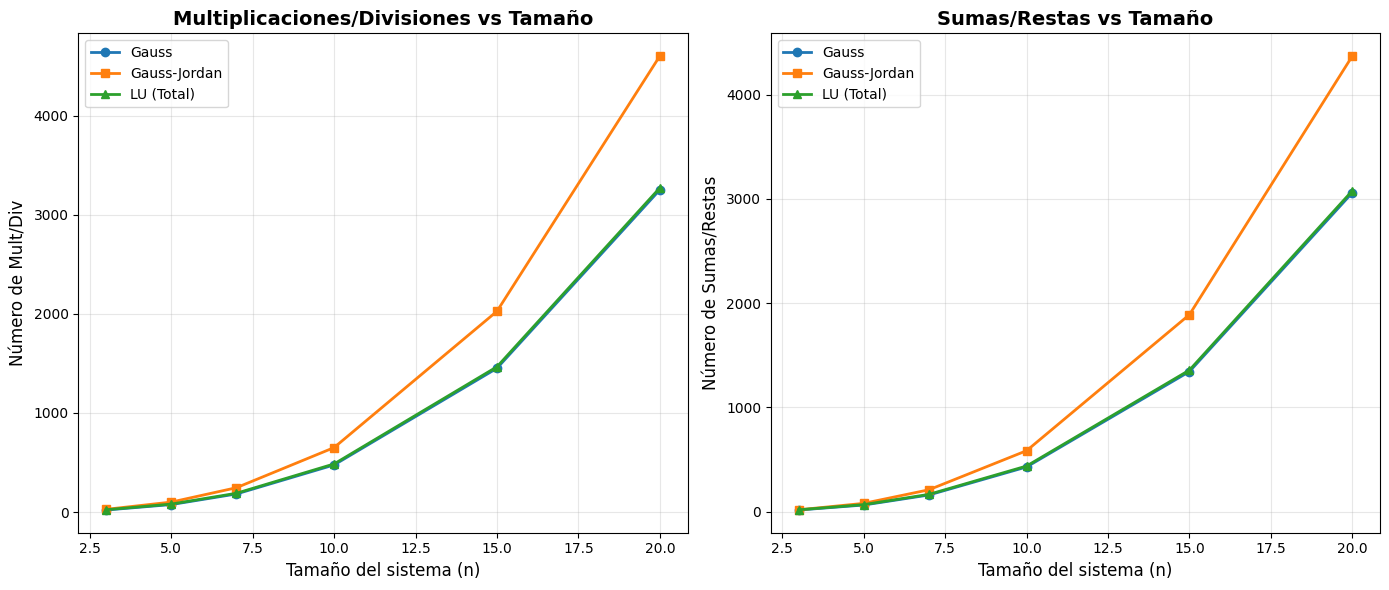

Gráfica guardada como 'experimental_vs_teorico.png'


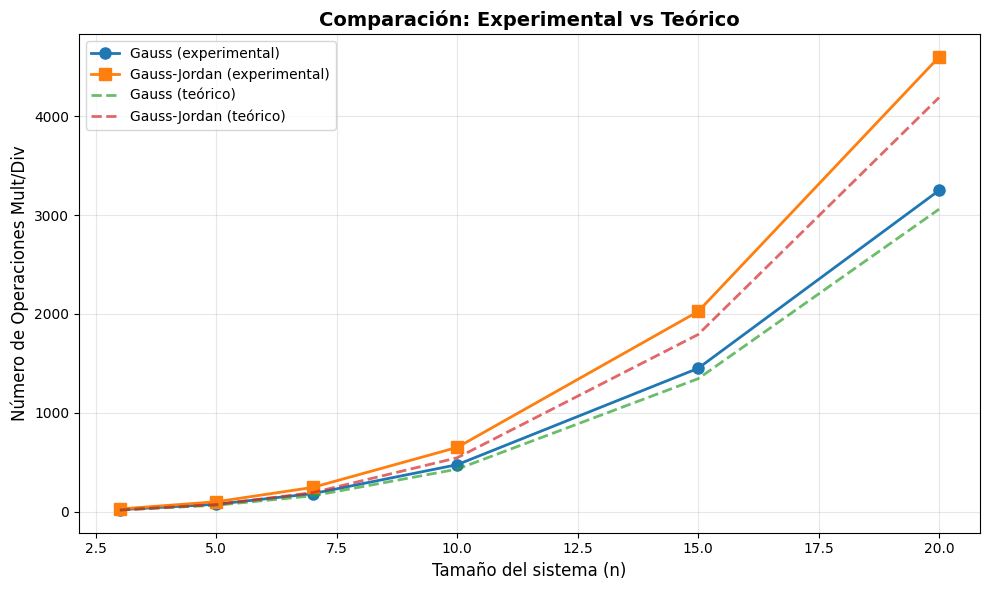

In [11]:
# GRÁFICAS

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfica 1: Multiplicaciones/Divisiones
ax1.plot(tamaños, resultados['gauss']['mult_div'], 'o-', label='Gauss', linewidth=2)
ax1.plot(tamaños, resultados['gauss_jordan']['mult_div'], 's-', label='Gauss-Jordan', linewidth=2)
ax1.plot(tamaños, resultados['lu_total']['mult_div'], '^-', label='LU (Total)', linewidth=2)
ax1.set_xlabel('Tamaño del sistema (n)', fontsize=12)
ax1.set_ylabel('Número de Mult/Div', fontsize=12)
ax1.set_title('Multiplicaciones/Divisiones vs Tamaño', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfica 2: Sumas/Restas
ax2.plot(tamaños, resultados['gauss']['sumas'], 'o-', label='Gauss', linewidth=2)
ax2.plot(tamaños, resultados['gauss_jordan']['sumas'], 's-', label='Gauss-Jordan', linewidth=2)
ax2.plot(tamaños, resultados['lu_total']['sumas'], '^-', label='LU (Total)', linewidth=2)
ax2.set_xlabel('Tamaño del sistema (n)', fontsize=12)
ax2.set_ylabel('Número de Sumas/Restas', fontsize=12)
ax2.set_title('Sumas/Restas vs Tamaño', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('comparacion_complejidad.png', dpi=300, bbox_inches='tight')
print("Gráfica guardada como 'comparacion_complejidad.png'")
plt.show()

# Gráfica de complejidad O(n³)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(tamaños, resultados['gauss']['mult_div'], 'o-', label='Gauss (experimental)', linewidth=2, markersize=8)
ax.plot(tamaños, resultados['gauss_jordan']['mult_div'], 's-', label='Gauss-Jordan (experimental)', linewidth=2, markersize=8)

# Curvas teóricas
teoricas_gauss = [complejidad_teorica_gauss(n)['mult_div'] for n in tamaños]
teoricas_gj = [complejidad_teorica_gauss_jordan(n)['mult_div'] for n in tamaños]

ax.plot(tamaños, teoricas_gauss, '--', label='Gauss (teórico)', linewidth=2, alpha=0.7)
ax.plot(tamaños, teoricas_gj, '--', label='Gauss-Jordan (teórico)', linewidth=2, alpha=0.7)

ax.set_xlabel('Tamaño del sistema (n)', fontsize=12)
ax.set_ylabel('Número de Operaciones Mult/Div', fontsize=12)
ax.set_title('Comparación: Experimental vs Teórico', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('experimental_vs_teorico.png', dpi=300, bbox_inches='tight')
print("Gráfica guardada como 'experimental_vs_teorico.png'")
plt.show()